# Alzheimer’s Disease: 
Alzheimer’s is a progressive disease, where dementia symptoms gradually worsen over a number of years. In its early stages, memory loss is mild, but with late-stage Alzheimer’s, individuals lose the ability to carry on a conversation and respond to their environment.
Although current Alzheimer’s treatments cannot stop Alzheimer’s from progressing, they can temporarily slow the worsening of dementia symptoms and improve quality of life for those with Alzheimer’s and their caregivers. Image Processing plays an important role in the early detection of Alzheimer’s disease so that patients can be prevented before irreversible changes occur in the brain.


# Primary Dataset:
https://www.kaggle.com/yasserhessein/dataset-alzheimer


##### Task : 
Prediction model for Classifying the **four types** of **Alzheimer's Disease**

**Four types** of **Alzheimer's Disease** : 
- Mild Demented
- Moderate Demented
- Non Demented
- Very Mild Demented

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

##### Loading the data as train set and validation set

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r'C:\Users\ASUS\Desktop\Alzheimers Disease Classification\Alzheimer_s Dataset\train',
    validation_split=0.2,
    subset="training",
    seed=1337,
    batch_size=32,
    image_size=(256, 256)
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   directory=r'C:\Users\ASUS\Desktop\Alzheimers Disease Classification\Alzheimer_s Dataset\test',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    batch_size=32,
    image_size=(256, 256)
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 1279 files belonging to 4 classes.
Using 255 files for validation.


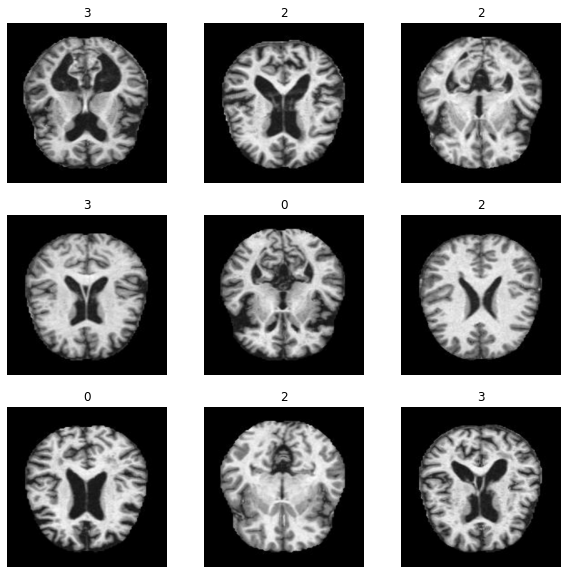

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(100):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# CNN Model (Without Augmentation)

In [6]:
num_classes = 4
img_height,img_width=256,256
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [7]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10


C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


129/129 [==============================] - 72s 559ms/step - loss: 1.0151 - accuracy: 0.5062 - val_loss: 0.9133 - val_accuracy: 0.5647
Epoch 2/10
129/129 [==============================] - 69s 536ms/step - loss: 0.7771 - accuracy: 0.6573 - val_loss: 0.8283 - val_accuracy: 0.6510
Epoch 3/10
129/129 [==============================] - 73s 565ms/step - loss: 0.4209 - accuracy: 0.8289 - val_loss: 1.1578 - val_accuracy: 0.5843
Epoch 4/10
129/129 [==============================] - 73s 563ms/step - loss: 0.1894 - accuracy: 0.9282 - val_loss: 1.8238 - val_accuracy: 0.5765
Epoch 5/10
129/129 [==============================] - 72s 557ms/step - loss: 0.0776 - accuracy: 0.9727 - val_loss: 1.9740 - val_accuracy: 0.5961
Epoch 6/10
129/129 [==============================] - 69s 532ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 2.6324 - val_accuracy: 0.5686
Epoch 7/10
129/129 [==============================] - 69s 534ms/step - loss: 0.0227 - accuracy: 0.9922 - val_loss: 3.2295 - val_accuracy: 0.5

In [9]:
val_loss, val_acc = model.evaluate(val_ds, verbose=1)

8/8 [==============================] - 1s 113ms/step - loss: 3.3437 - accuracy: 0.6118


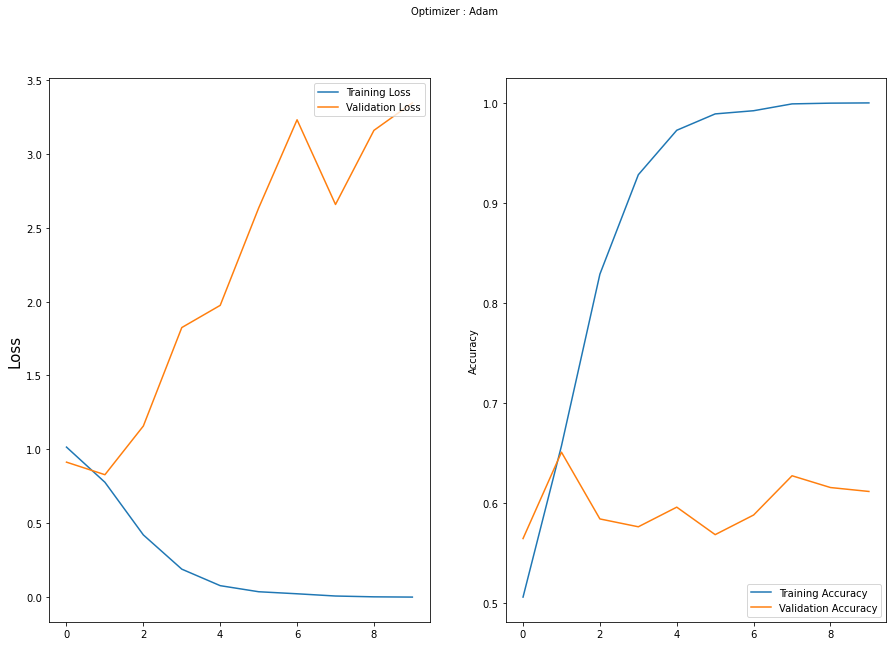

In [10]:
#### Plot the result on validation data

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=15)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=10)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## CNN Model (With Augmentation)

In [5]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [6]:
# building models in Sequential way

num_classes = 4
img_height,img_width=256,256

model = Sequential()
model.add(data_augmentation)

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [7]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)

Epoch 1/10
129/129 [==============================] - 72s 556ms/step - loss: 1.0477 - accuracy: 0.4955 - val_loss: 0.9592 - val_accuracy: 0.5608
Epoch 2/10
129/129 [==============================] - 78s 600ms/step - loss: 1.0164 - accuracy: 0.5060 - val_loss: 0.9402 - val_accuracy: 0.5647
Epoch 3/10
129/129 [==============================] - 76s 586ms/step - loss: 0.9587 - accuracy: 0.5284 - val_loss: 1.0961 - val_accuracy: 0.5686
Epoch 4/10
129/129 [==============================] - 75s 582ms/step - loss: 0.9189 - accuracy: 0.5555 - val_loss: 0.8810 - val_accuracy: 0.5882
Epoch 5/10
129/129 [==============================] - 75s 584ms/step - loss: 0.9134 - accuracy: 0.5575 - val_loss: 0.8772 - val_accuracy: 0.5843
Epoch 6/10
129/129 [==============================] - 76s 590ms/step - loss: 0.9016 - accuracy: 0.5643 - val_loss: 0.8996 - val_accuracy: 0.5686
Epoch 7/10
129/129 [==============================] - 78s 602ms/step - loss: 0.8855 - accuracy: 0.5690 - val_loss: 0.8784 - val_ac

In [9]:
val_loss, val_acc = model.evaluate(val_ds, verbose=1)

8/8 [==============================] - 1s 110ms/step - loss: 0.8921 - accuracy: 0.6039


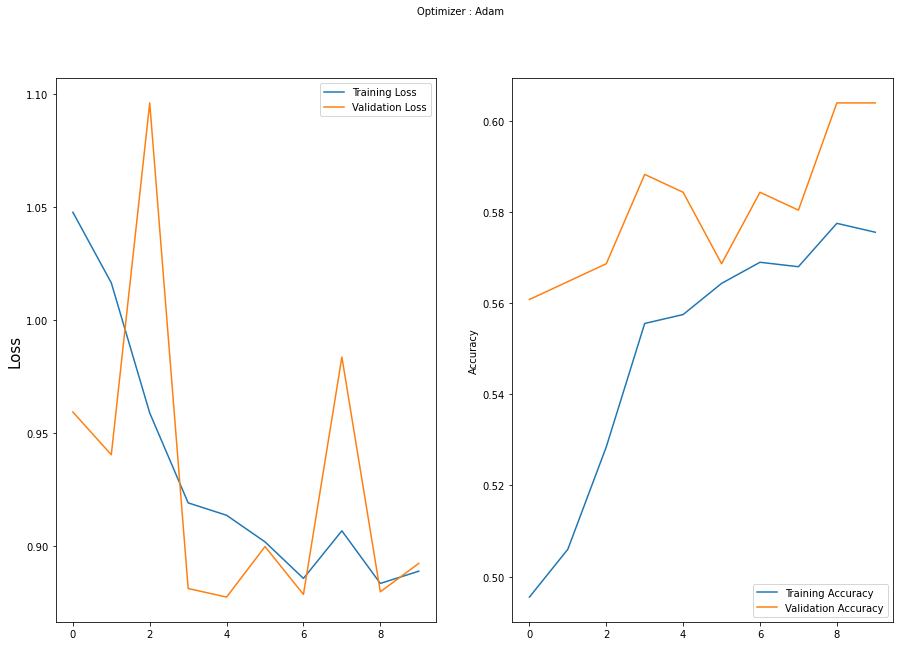

In [10]:
#### Plot the result on validation data

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=15)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=10)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()